# Reading ASTI AWS netcdf data

Author: [Irene Crisologo](http://philippineradarnetwork.wordpress.com/)

This notebook shows how to read the extracted netcdf files and generate a Pandas dataframe from the contents. A few examples of how to work with the Pandas dataframe are shown below, as well as examples on how to plot the data.

#### Import necessary modules
Here we need [numpy](www.numpy.org/) to handle arrays, [Pandas](pandas.pydata.org/) for making a structured dataset, [netCDF4](unidata.github.io/netcdf4-python/) for reading the netcdf files, [datetime](https://docs.python.org/2/library/datetime.html) for handling date and time objects, and pylab for plotting.

In [2]:
%matplotlib inline 
# above is an iPython magic command that displays plots immediately after the cell where the plot was made
import numpy as np
import pandas as pd
import netCDF4 as nc
import datetime as dt
import pylab as pl

Set the path of the file we want to read.

In [5]:
fname = '../dataset/agws.01m.v1.201211.nc'

Read the netcdf file.

In [6]:
dset = nc.Dataset(fname)

Display all the variables contained in the file, as well as the length of each variable.

In [7]:
for var in dset.variables.keys():
    print var, len(dset[var][...])

station_id 189
station_location 189
station_municipality 189
station_province 189
station_region 189
station_type 189
sampling_period 189
lat 189
lon 189
alt 189
stationIndex 497334
timestamp 497334
relative_humidity 497334
relative_humidity_qc 497334
surface_air_pressure 497334
surface_air_pressure_qc 497334
air_temperature 497334
air_temperature_qc 497334
total_rainfall_amount 497334
total_rainfall_amount_qc 497334
rainfall_duration 497334
rainfall_duration_qc 497334
rainfall_rate 497334
rainfall_rate_qc 497334
rainfall_amount 497334
rainfall_amount_qc 497334
waterlevel 497334
waterlevel_qc 497334
waterlevel_msl 497334
waterlevel_msl_qc 497334
wind_direction 497334
wind_direction_qc 497334
wind_direction_10m 497334
wind_direction_10m_qc 497334
wind_direction_max 497334
wind_direction_max_qc 497334
wind_direction_max_10m 497334
wind_direction_max_10m_qc 497334
wind_speed 497334
wind_speed_qc 497334
wind_speed_10m 497334
wind_speed_10m_qc 497334
wind_speed_max 497334
wind_speed_max_qc 

The list above means that the first ten variables are the metadata, where the number of stations within the file corresponds to the number printed beside it. The succeeding variables are the dataset variables.

Separate attributes from data.

In [27]:
attrs_keys = dset.variables.keys()[:10]

In [28]:
# get all, or portion of the dataset
#data_keys = dset.variables.keys()[10:]

# or specify the variables you want to extract
data_keys = ['rainfall_amount','air_temperature']

### Attributes

In [29]:
af = pd.DataFrame(index=dset['station_id'][...], columns=attrs_keys)

In [30]:
# remove some keys because they will be handled differently in making the dataframe
string_keys = ['station_location','station_municipality','station_province','station_region']
for key in string_keys:
    attrs_keys.remove(key)
    # the attributes in the list are stored as list of characters, this step concatenates them into a coherent string
    af[key] = ["".join(data).strip() for data in dset[key][...]]

In [14]:
for akey in attrs_keys:
    if akey not in string_keys:
        af[akey] = dset[akey][...]

In [15]:
af.head()

,station_id,station_location,station_municipality,station_province,station_region,station_type,sampling_period,lat,lon,alt
16,16,JARO,ILOILO CITY,Iloilo,6,5,15,10.772,122.579002,7.0
17,17,ALANGILAN-IDP,BACOLOD CITY,Negros Occidental,6,2,15,10.661,123.079002,0.0
18,18,ESTEFANIA,BACOLOD CITY,Negros Occidental,6,1,15,10.668,122.984001,0.0
19,19,TANGUB,BACOLOD CITY,Negros Occidental,6,1,15,10.641,122.924004,0.0
21,21,"BRGY. SAN RAYMUNDO, JOLO, SULU",JOLO,Sulu,ARMM,5,15,6.058,121.010002,0.0


### Dataset

In [16]:
datetimes = [dt.datetime.utcfromtimestamp(t) for t in dset['timestamp'][...]]

In [17]:
df = pd.DataFrame(index=dset['stationIndex'][...], columns=data_keys)

In [18]:
df['timestamp'] = datetimes

In [19]:
for dkey in data_keys:
    if dkey != 'timestamp':
        df[dkey] = dset[dkey][...]

In [20]:
df.head()

,rainfall_amount,air_temperature,timestamp
0.0,0.0,27.799999,2012-11-01 00:00:05
0.0,0.0,28.200001,2012-11-01 00:15:05
0.0,0.0,28.500000,2012-11-01 00:30:06
0.0,0.0,28.900000,2012-11-01 00:45:06
0.0,0.0,29.200001,2012-11-01 01:00:06


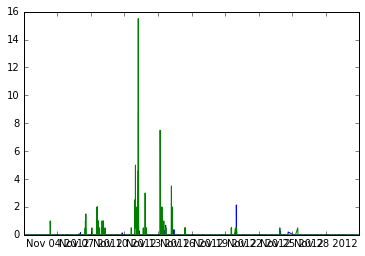

In [21]:
pl.plot(df['timestamp'][0],df['rainfall_amount'][0])
pl.plot(df['timestamp'][1],df['rainfall_amount'][1])